In [114]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [124]:
df = pd.read_csv("./parks.csv", index_col = ['Park Code']) #use what to index

In [125]:
df.head(3)

,Park Name,State,Acres,Latitude,Longitude
Park Code,,,,,
ACAD,Acadia National Park,ME,47390,44.35,-68.21
ARCH,Arches National Park,UT,76519,38.68,-109.57
BADL,Badlands National Park,SD,242756,43.75,-102.50


In [128]:
#rows
print(df.loc['ACAD'])
print(df.iloc[0])
print(df.loc[['ACAD', 'ARCH']])
print(df.iloc[[0, 1]])

Park Name    Acadia National Park
State                          ME
Acres                       47390
Latitude                    44.35
Longitude                  -68.21
Name: ACAD, dtype: object
Park Name    Acadia National Park
State                          ME
Acres                       47390
Latitude                    44.35
Longitude                  -68.21
Name: ACAD, dtype: object
                      Park Name State  Acres  Latitude  Longitude
Park Code                                                        
ACAD       Acadia National Park    ME  47390     44.35     -68.21
ARCH       Arches National Park    UT  76519     38.68    -109.57
                      Park Name State  Acres  Latitude  Longitude
Park Code                                                        
ACAD       Acadia National Park    ME  47390     44.35     -68.21
ARCH       Arches National Park    UT  76519     38.68    -109.57


In [54]:
#columns
print(df.State.head(2))
print(df['State'].head(2))
print(df[['State','Acres']].head(2)) #multiple columns

Park Code
ACAD    ME
ARCH    UT
Name: State, dtype: object
Park Code
ACAD    ME
ARCH    UT
Name: State, dtype: object
          State  Acres
Park Code             
ACAD         ME  47390
ARCH         UT  76519


In [56]:
#function on column
df.columns = [col.replace(" ","_").lower() for col in df.columns]
df.columns

Index(['park_name', 'state', 'acres', 'latitude', 'longitude'], dtype='object')

In [60]:
#select
print(df[df.state == "ME"])
print(df['state'].apply(lambda x: x + " HAHA").head(3))

                      park_name state  acres  latitude  longitude
Park Code                                                        
ACAD       Acadia National Park    ME  47390     44.35     -68.21
Park Code
ACAD    ME HAHA
ARCH    UT HAHA
BADL    SD HAHA
Name: state, dtype: object


In [62]:
#create
df_create = pd.DataFrame({"col1":[1,2,3], "col2":[4,5,6]})
df_create

,col1,col2
0,1,4
1,2,5
2,3,6


In [63]:
reviews = pd.read_csv("./winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [65]:
reviews['province'].value_counts().head(3)

California    44508
Washington     9750
Tuscany        7281
Name: province, dtype: int64

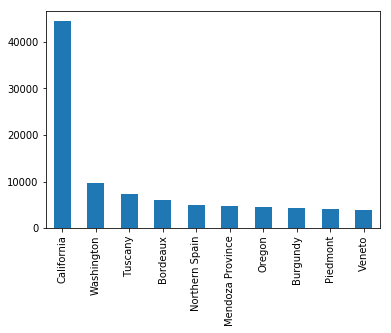

In [74]:
reviews['province'].value_counts().head(10).plot.bar() #count the number

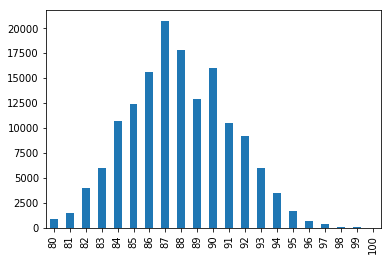

In [88]:
reviews['points'].value_counts().sort_index().plot.bar()

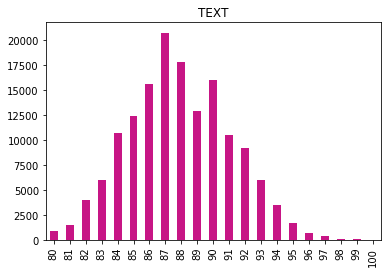

In [96]:
#different style
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize = (6, 4), #size of the picture
    color = 'mediumvioletred',
    fontsize = 10)
ax.set_title("TEXT")

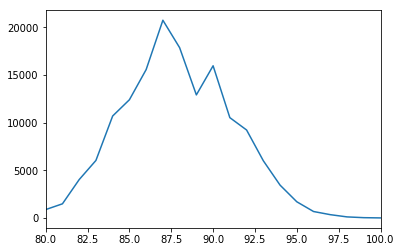

In [75]:
reviews['points'].value_counts().sort_index().plot.line()

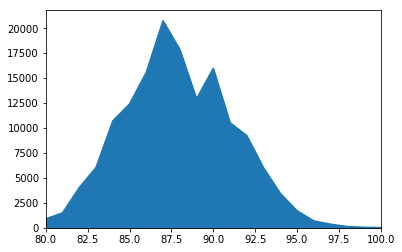

In [86]:
reviews['points'].value_counts().sort_index().plot.area()

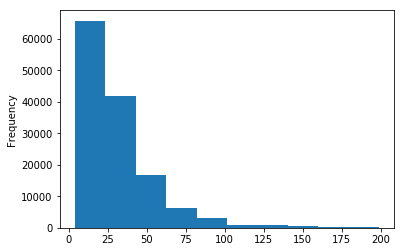

In [76]:
reviews[reviews['price'] < 200]['price'].plot.hist()

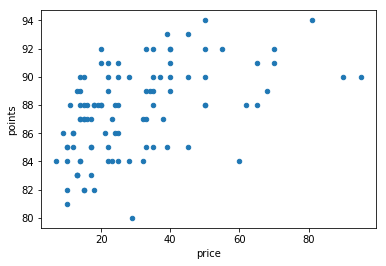

In [79]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')
#this cannot effectively treat points which map to the same place

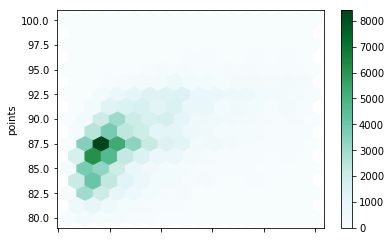

In [81]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

In [83]:
wine_counts = pd.read_csv("./top-five-wine-score-counts.csv",
                          index_col=0)
wine_counts.head(3)

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0


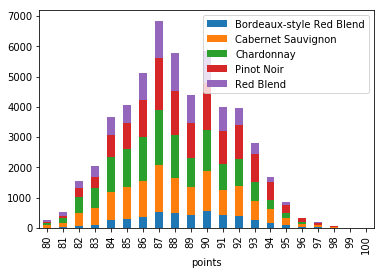

In [84]:
wine_counts.plot.bar(stacked=True)

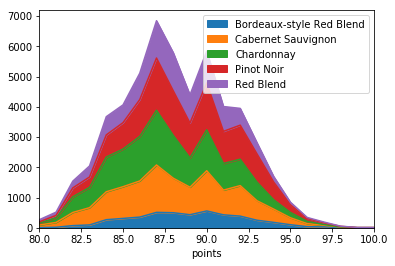

In [85]:
wine_counts.plot.area()

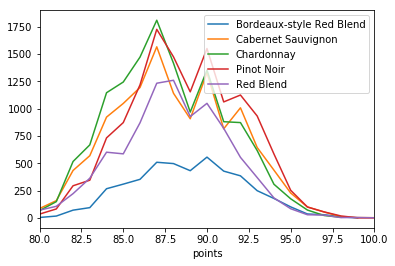

In [87]:
wine_counts.plot.line()

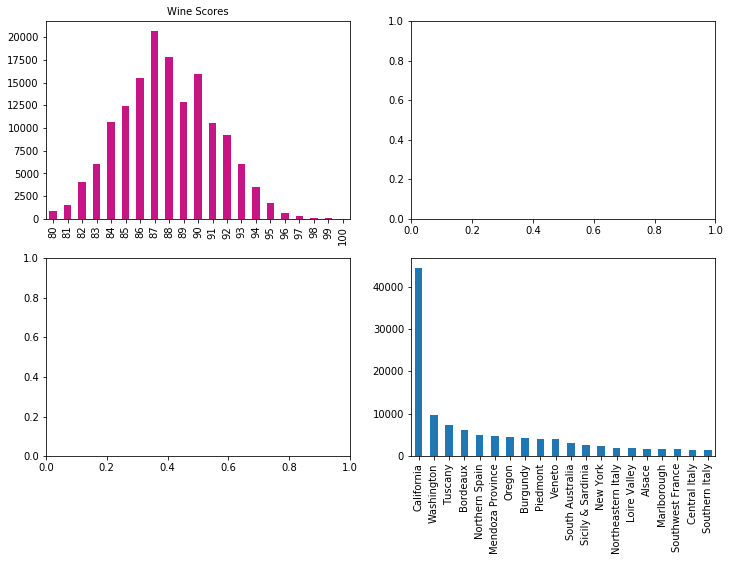

In [102]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], color = "mediumvioletred"
)
axarr[0][0].set_title("Wine Scores", fontsize=10)
reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)

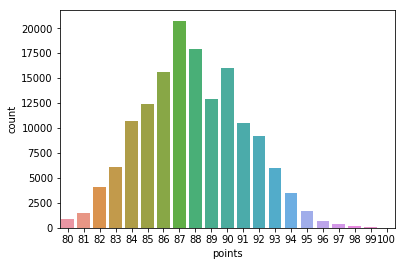

In [104]:
sns.countplot(reviews['points']) #countplot aggregate count, no need to use value_counts

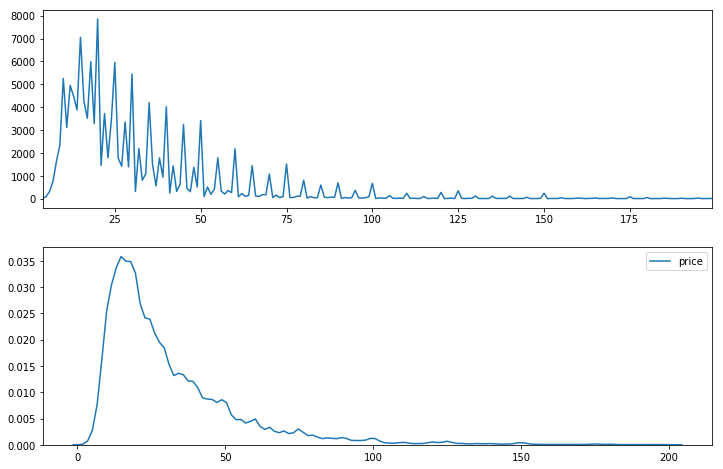

In [107]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line(
            ax = axarr[0])
sns.kdeplot(reviews.query('price < 200').price, ax = axarr[1]) #

KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

For example, suppose that there was just one wine priced 19.93, but several hundred prices 20.00. If we were to plot the value counts in a line chart, our line would dip very suddenly down to 1 and then back up to around 1000 again, creating a strangely "jagged" line. The line chart with the same data, shown below for the purposes of comparison, has exactly this problem!

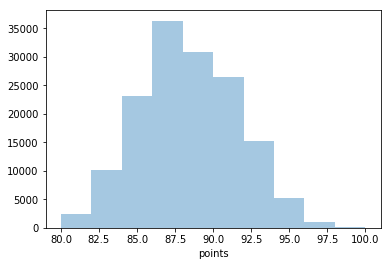

In [108]:
sns.distplot(reviews['points'], bins=10, kde=False)

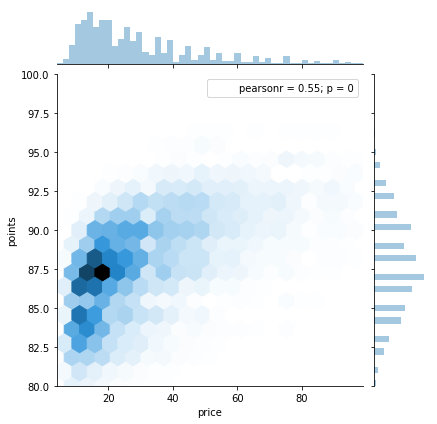

In [110]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)
#if there is no "kind" information, this will just be a scatter

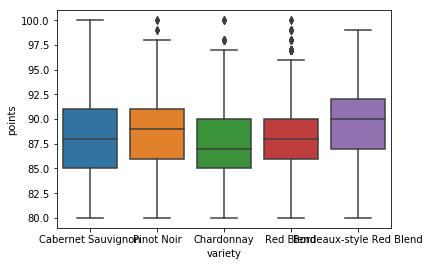

In [111]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

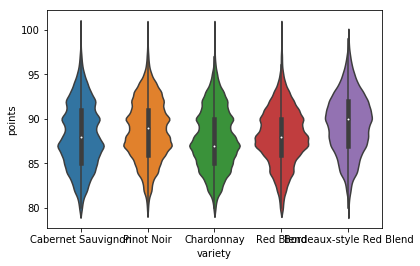

In [113]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]
)

In [115]:
pd.set_option('max_columns', None)
df = pd.read_csv("./CompleteDataset.csv", index_col=0)

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


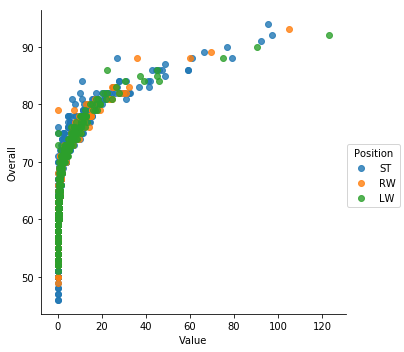

In [117]:
sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

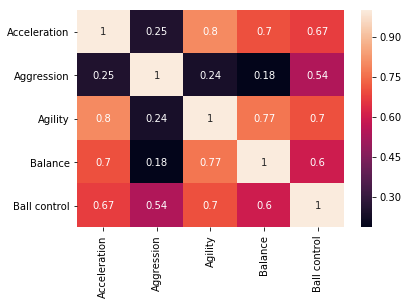

In [130]:
f = (
    footballers[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)